In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [2]:
import os
os.chdir('D:\Python Programming\Data')
#df_airline=pd.read_csv('airline_passengers.csv')

In [3]:
os.getcwd()

'D:\\Python Programming\\Data'

In [4]:
df_airline=pd.read_csv('airline_passengers.csv')

In [5]:
df_airline

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0
...,...,...
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0


In [6]:
df_airline.dropna(axis=0, inplace=True)

In [7]:
#check whaether is null value or not , now we have to drop that(operation above)
#df_airline.isnull().sum()

In [8]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    144 non-null    object 
 1   Thousands of Passengers  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.4+ KB


In [9]:
#Convert month to datetime
df_airline['Month'] = pd.to_datetime(df_airline['Month'])

In [10]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


In [11]:
df_airline.head()

,Month,Thousands of Passengers
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


In [12]:
#Set month column at index
df_airline.set_index('Month', inplace=True)

In [13]:
df_airline.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


<AxesSubplot:xlabel='Month'>

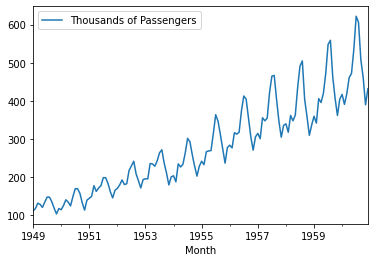

In [14]:
df_airline.plot()

In [15]:
#Now the datta is not stationary so we have to use  dickifuller test
from statsmodels.tsa.stattools import adfuller

In [16]:
def adf_test(series):
    result=adfuller(series)
    #We are checking this data for 2 values
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [17]:
adf_test(df_airline['Thousands of Passengers'])

ADF Statistics: 0.8153688792060463
p- value: 0.991880243437641
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [18]:
#Now we make a diffreces in order to make it statinary
df_airline['Passengers First Difference']=df_airline['Thousands of Passengers']-df_airline['Thousands of Passengers'].shift(1)
#we used in dicki fuller(in copy),
#we make a diffrences by one day thats why we use shift

In [19]:
df_airline.head()


,Thousands of Passengers,Passengers First Difference
Month,,
1949-01-01,112.0,NaN
1949-02-01,118.0,6.0
1949-03-01,132.0,14.0
1949-04-01,129.0,-3.0
1949-05-01,121.0,-8.0


In [20]:
adf_test(df_airline['Passengers First Difference'].dropna())

ADF Statistics: -2.8292668241699923
p- value: 0.054213290283826474
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [21]:
#again it is non statinary
#We make a use of 2nd differencing
df_airline['Passengers Second Difference']=df_airline['Passengers First Difference']-df_airline['Passengers First Difference'].shift(1)

In [22]:
adf_test(df_airline['Passengers First Difference'].dropna())

ADF Statistics: -2.8292668241699923
p- value: 0.054213290283826474
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [23]:
df_airline['Passengers Second Difference']=df_airline['Passengers First Difference']-df_airline['Passengers First Difference'].shift(1)

In [24]:
adf_test(df_airline['Passengers Second Difference'].dropna())

ADF Statistics: -16.384231542468516
p- value: 2.7328918500141235e-29
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [25]:
#Now we got the stationary graph so we have to do 
#this for the entire year as same as graph
df_airline['Passengers 12 Difference']=df_airline['Thousands of Passengers']-df_airline['Thousands of Passengers'].shift(12)

In [26]:
adf_test(df_airline['Passengers 12 Difference'].dropna())

ADF Statistics: -3.383020726492481
p- value: 0.011551493085514952
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [27]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf#plot autocorrelation plot

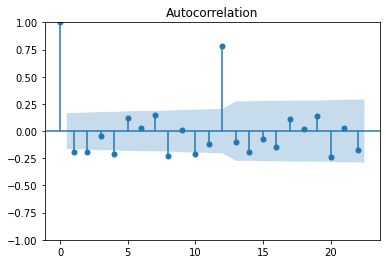

In [28]:
acf = plot_acf(df_airline["Passengers Second Difference"].dropna())
#Example Jan, Feb 
#in acf we see , how one data related to another, and 2nd related to 3rd and by combining, in this we also use pearson correlation

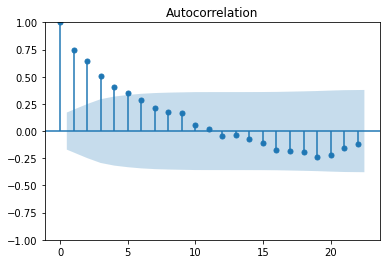

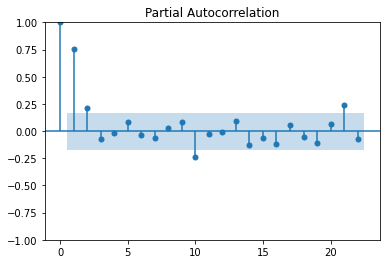

In [29]:
#See some kinds of seasonality
#check  p=1, q=13
acf12 = plot_acf(df_airline["Passengers 12 Difference"].dropna())
pacf12 = plot_pacf(df_airline["Passengers 12 Difference"].dropna())
#band increases eror part also increases

In [30]:
## split train and test data
df_airline

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1960-08-01,606.0,-16.0,-103.0,47.0
1960-09-01,508.0,-98.0,-82.0,45.0
1960-10-01,461.0,-47.0,51.0,54.0


In [31]:
from datetime import datetime,timedelta
train_dataset_end=datetime(1955,12,1)
test_dataset_end=datetime(1960,12,1)

In [32]:
train_data=df_airline[:train_dataset_end]
test_data=df_airline[train_dataset_end+timedelta(days=1):test_dataset_end]

In [33]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [34]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [35]:
test_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1956-01-01,284.0,6.0,-35.0,42.0
1956-02-01,277.0,-7.0,-13.0,44.0
1956-03-01,317.0,40.0,47.0,50.0
1956-04-01,313.0,-4.0,-44.0,44.0
1956-05-01,318.0,5.0,9.0,48.0
1956-06-01,374.0,56.0,51.0,59.0
1956-07-01,413.0,39.0,-17.0,49.0
1956-08-01,405.0,-8.0,-47.0,58.0
1956-09-01,355.0,-50.0,-42.0,43.0


In [36]:
#Create Sarima Model
#Create Arima Model
model_SARIMA = sm.tsa.arima.ARIMA(train_data['Thousands of Passengers'], order=(3,0,6),seasonal_order=(0,1,0,12))
#p and q are already captured from here
model_ARIMA = sm.tsa.arima.ARIMA(train_data['Thousands of Passengers'], order=(3,2,6))







#model_ARIMA = sm.tsa.arima.ARIMA(train_data['Thousands of Passengers'], order=(0,2,0))



In [37]:
model_SARIMA_fit = model_SARIMA.fit()

In [38]:
model_ARIMA_fit = model_ARIMA.fit()

In [39]:
model_SARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:           Thousands of Passengers   No. Observations:                   84
Model:             ARIMA(3, 0, 6)x(0, 1, [], 12)   Log Likelihood                -265.222
Date:                           Tue, 19 Jul 2022   AIC                            550.443
Time:                                   16:44:16   BIC                            573.210
Sample:                               01-01-1949   HQIC                           559.507
                                    - 12-01-1955                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4698      2.088      0.225      0.822      -3.622       4.562
ar.L2          0.8457      0.345      2.450      0.014       0.169       1.522
ar.L3         -0.3437      1.770     -0.194      0.846      -3.814       3.126
ma.L1          0.3113      2.361      0.132      0.895      -4.316       4.938
ma.L2         -0.4497      1.483     -0.303      0.762      -3.356       2.456
ma.L3         -0.1215      0.435     -0.279      0.780      -0.974       0.731
ma.L4         -0.1596      0.519     -0.307      0.759      -1.177       0.858
ma.L5          0.2250      0.448      0.502      0.616      -0.653       1.103
ma.L6          0.0300      0.309      0.097      0.923      -0.576       0.636
sigma2        87.5763     80.879      1.083      0.279     -70.944     246.097
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 2.79
Prob(Q):                              0.88   Prob(JB):                         0.25
Heteroskedasticity (H):               2.03   Skew:                             0.47
Prob(H) (two-sided):                  0.09   Kurtosis:                         2.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [40]:
model_ARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  SARIMAX Results                                  
===================================================================================
Dep. Variable:     Thousands of Passengers   No. Observations:                   84
Model:                      ARIMA(3, 2, 6)   Log Likelihood                -352.698
Date:                     Tue, 19 Jul 2022   AIC                            725.396
Time:                             16:44:16   BIC                            749.464
Sample:                         01-01-1949   HQIC                           735.059
                              - 12-01-1955                                         
Covariance Type:                       opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2572      0.710     -1.770      0.077      -2.650       0.135
ar.L2         -0.6855      0.348     -1.969      0.049      -1.368      -0.003
ar.L3         -0.4076      0.275     -1.481      0.139      -0.947       0.132
ma.L1          0.2887    115.111      0.003      0.998    -225.324     225.901
ma.L2         -0.9065    480.927     -0.002      0.998    -943.506     941.693
ma.L3         -0.8265    300.249     -0.003      0.998    -589.304     587.651
ma.L4         -0.9260    915.111     -0.001      0.999   -1794.510    1792.658
ma.L5          0.5369    211.030      0.003      0.998    -413.074     414.148
ma.L6          0.8354    441.878      0.002      0.998    -865.230     866.901
sigma2       251.3914   1.33e+05      0.002      0.998    -2.6e+05    2.61e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                 3.56
Prob(Q):                              0.80   Prob(JB):                         0.17
Heteroskedasticity (H):               3.75   Skew:                             0.45
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [41]:
test_data.tail()

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1960-08-01,606.0,-16.0,-103.0,47.0
1960-09-01,508.0,-98.0,-82.0,45.0
1960-10-01,461.0,-47.0,51.0,54.0
1960-11-01,390.0,-71.0,-24.0,28.0
1960-12-01,432.0,42.0,113.0,27.0


In [42]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)
#going to do prediction from 56 to 12

1956-01-01 00:00:00
1960-12-01 00:00:00


In [43]:
# pred=model_SARIMA_fit.predict(start=pred_start_date,end=pred_end_date)
pred=model_ARIMA_fit.predict(start=pred_start_date,end=pred_end_date)
pred_sarima=model_SARIMA_fit.predict(start=datetime(1956,6,6) ,end=datetime(1960,12,1))
residuals=test_data['Thousands of Passengers']-pred


In [44]:
pred

1956-01-01    293.728064
1956-02-01    293.257567
1956-03-01    302.141610
1956-04-01    291.245289
1956-05-01    294.392675
1956-06-01    301.498613
1956-07-01    302.062986
1956-08-01    302.414110
1956-09-01    305.904084
1956-10-01    308.260216
1956-11-01    309.977095
1956-12-01    311.995577
1957-01-01    314.535199
1957-02-01    316.473441
1957-03-01    318.687579
1957-04-01    320.754697
1957-05-01    323.062630
1957-06-01    325.056144
1957-07-01    327.339791
1957-08-01    329.376064
1957-09-01    331.652600
1957-10-01    333.678401
1957-11-01    335.955550
1957-12-01    337.990657
1958-01-01    340.259955
1958-02-01    342.298303
1958-03-01    344.565115
1958-04-01    346.607566
1958-05-01    348.869602
1958-06-01    350.916258
1958-07-01    353.174610
1958-08-01    355.224962
1958-09-01    357.479479
1958-10-01    359.533621
1958-11-01    361.784495
1958-12-01    363.842181
1959-01-01    366.089553
1959-02-01    368.150698
1959-03-01    370.394677
1959-04-01    372.459143


In [45]:
residuals

Month
1956-01-01     -9.728064
1956-02-01    -16.257567
1956-03-01     14.858390
1956-04-01     21.754711
1956-05-01     23.607325
1956-06-01     72.501387
1956-07-01    110.937014
1956-08-01    102.585890
1956-09-01     49.095916
1956-10-01     -2.260216
1956-11-01    -38.977095
1956-12-01     -5.995577
1957-01-01      0.464801
1957-02-01    -15.473441
1957-03-01     37.312421
1957-04-01     27.245303
1957-05-01     31.937370
1957-06-01     96.943856
1957-07-01    137.660209
1957-08-01    137.623936
1957-09-01     72.347400
1957-10-01     13.321599
1957-11-01    -30.955550
1957-12-01     -1.990657
1958-01-01     -0.259955
1958-02-01    -24.298303
1958-03-01     17.434885
1958-04-01      1.392434
1958-05-01     14.130398
1958-06-01     84.083742
1958-07-01    137.825390
1958-08-01    149.775038
1958-09-01     46.520521
1958-10-01     -0.533621
1958-11-01    -51.784495
1958-12-01    -26.842181
1959-01-01     -6.089553
1959-02-01    -26.150698
1959-03-01     35.605323
1959-04-01     23.5

<AxesSubplot:xlabel='Month'>

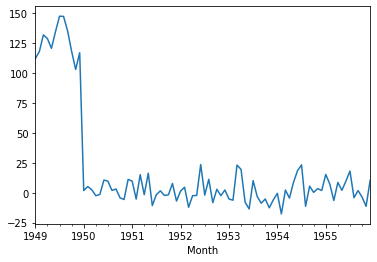

In [46]:
model_SARIMA_fit.resid.plot()

<AxesSubplot:ylabel='Density'>

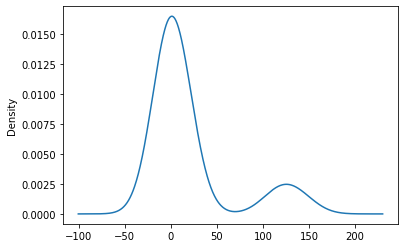

In [47]:
model_SARIMA_fit.resid.plot(kind='kde')
#use to make prpbablity density funct of a random variable
#whare the mean and median of the graph located

<AxesSubplot:ylabel='Density'>

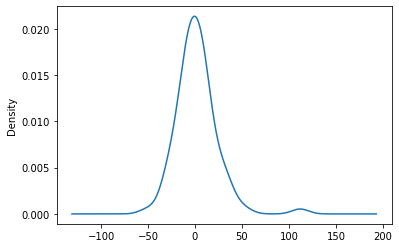

In [48]:
model_ARIMA_fit.resid.plot(kind='kde')

In [49]:
#All the value are take it inside a new column
test_data['Predicted_SARIMA']=pred_sarima
test_data['Predicted_ARIMA']=pred

In [50]:
test_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference,Predicted_SARIMA,Predicted_ARIMA
Month,,,,,,
1956-01-01,284.0,6.0,-35.0,42.0,NaN,293.728064
1956-02-01,277.0,-7.0,-13.0,44.0,NaN,293.257567
1956-03-01,317.0,40.0,47.0,50.0,NaN,302.141610
1956-04-01,313.0,-4.0,-44.0,44.0,NaN,291.245289
1956-05-01,318.0,5.0,9.0,48.0,NaN,294.392675
1956-06-01,374.0,56.0,51.0,59.0,NaN,301.498613
1956-07-01,413.0,39.0,-17.0,49.0,403.404608,302.062986
1956-08-01,405.0,-8.0,-47.0,58.0,385.158151,302.414110
1956-09-01,355.0,-50.0,-42.0,43.0,349.502737,305.904084


<AxesSubplot:xlabel='Month'>

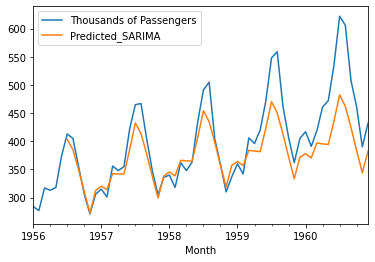

In [51]:
test_data[['Thousands of Passengers', 'Predicted_SARIMA']].plot()


<AxesSubplot:xlabel='Month'>

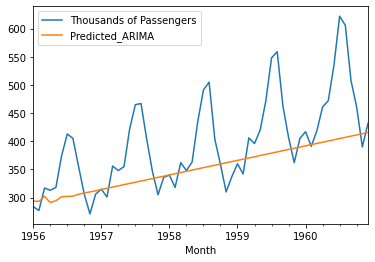

In [52]:
test_data[['Thousands of Passengers', 'Predicted_ARIMA']].plot()

<AxesSubplot:xlabel='Month'>

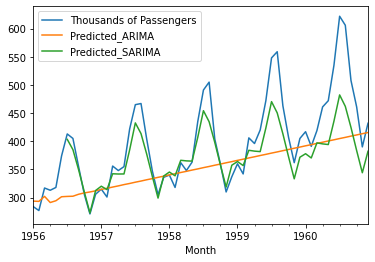

In [53]:
test_data[['Thousands of Passengers', 'Predicted_ARIMA' , 'Predicted_SARIMA']].plot()